# Part 1: Stationary dataset, first differences taken

## Demonstrating shift/slope/curvature with the first three PCs

### Dataset used: 2004 to 2020, average of AAA rated bonds, forward curve, daily data

Here in the first section I am just showing how the PC1 correlates to the shift, the PC2 correlates to the slope and how the PC3 correlates to the curvature.

I have sourced the data from the same source of the author Milan Lazarevic from his paper "Principal component analysis in negative interest rate environment" published in 2019 in the Acta Oeconomica Vol 69. 

You can find it here under daily data: https://ec.europa.eu/eurostat/data/database 
The folder to look for is >Data navigation tree> Database by themes > Economy and finance > Interest rates (irt)> Euro yield curves daily data 


<img src="attachment:screenshot%202020-09-30%20at%2018.16.53.png" style="max-width:100%">

### Data set picking and elaboration

I have, as the author, picked the forward curve instead of the spot curve and the average of the AAA rated bonds instead of the average of the entire euro area. 

My decision to pick the AAA average instead of the entire average of the entire eurozone is just to ensure consistency when I will later compare my result to his paper results in Parts 2 and 3. 

Parts 2 and 3 will deal with PCA applied in a positive vs a negative interest rate environment 

The decision to pick the forward curve instead of the spot curve comes from the critique that Lekkos provided in his paper of 2000. 

As Lazarevic states at page 109 "Data from the forward rate yield curve were used as the basis, instead of those from the zero-coupon rates, in accordance with the conclusions of Lord – Pelsser (2007) based on the criticism of Lekkos (2000). He pointed out the inadequacy of PCA’s approach to the yield curves of previous authors, primarily by Litterman – Scheinkman (1991) and Steeley (1990), in terms of choosing a zero-coupon rate. The rationale of Lekkos is that on the basis of these data we get a distorted picture (overestimation). The key argument is that zero yield represents the average of continuously compounded forward rates.".

The maturities picked are 1y, 2y, 3y, 4y, 5y, 7y, 10, 15y, 20y and 30y, as the author Milan Lazarevic. 

Before using these in R, I have worked on them one step prior on Excel. Meaning that I downloaded the daily data of the forward curve for the AAA rated bonds in Excel and took the first difference to get stationarity. He does this as well by stating this at page 114 "Therefore, it is recommended by Lardic et al. (2003) that the PCA is to be implemented on interest rate changes, since the use of the first differences provides evidence for stationarity of the time series com- prising the yield curve.".


## Code

In [1]:
#Loading the dataset

library("readxl")
library("dplyr")
library("stargazer") # for nice  tables




Attaching package: ‘dplyr’




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union





Please cite as: 




 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.



 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 




#### Loading data: This dataset has the first differences taken

In [2]:

data <- read_excel("fw_2004to2020_diff.xlsx")
head(data)


Date,oney,twoy,threey,foury,fivey,seveny,teny,fifteeny,twentyy,thirtyy
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2004M09D07,0.05,0.04,0.01,0.00,-0.01,-0.02,-0.03,-0.02,-0.02,-0.02
2004M09D08,0.03,0.04,0.04,0.03,0.02,0.01,0.01,-0.01,0.00,0.00
2004M09D09,-0.07,-0.10,-0.10,-0.09,-0.08,-0.06,-0.04,-0.02,-0.02,-0.01
2004M09D10,-0.07,-0.07,-0.06,-0.04,-0.04,-0.02,-0.02,-0.02,-0.02,-0.02
2004M09D13,0.06,0.05,0.04,0.01,0.01,0.00,0.00,0.01,0.01,0.00
2004M09D14,-0.02,-0.02,-0.02,-0.01,-0.01,-0.01,0.00,0.00,0.00,0.01


## Testing for Stationarity

### Augmented Dickey Fuller test - first differences taken here

In [3]:
library(tseries)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [4]:
adfresult1 <- adf.test(data$oney)

adfresult1


Warning message in adf.test(data$oney):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  data$oney
Dickey-Fuller = -15.449, Lag order = 15, p-value = 0.01
alternative hypothesis: stationary


In [5]:
adfresult2 <- adf.test(data$twoy)


adfresult2


Warning message in adf.test(data$twoy):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  data$twoy
Dickey-Fuller = -16.985, Lag order = 15, p-value = 0.01
alternative hypothesis: stationary


In [6]:

adfresult3 <- adf.test(data$threey)


adfresult3


Warning message in adf.test(data$threey):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  data$threey
Dickey-Fuller = -16.854, Lag order = 15, p-value = 0.01
alternative hypothesis: stationary


In [7]:
adfresult4 <- adf.test(data$foury)


adfresult4


Warning message in adf.test(data$foury):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  data$foury
Dickey-Fuller = -16.611, Lag order = 15, p-value = 0.01
alternative hypothesis: stationary


In [8]:
adfresult5 <- adf.test(data$fivey)




adfresult5


Warning message in adf.test(data$fivey):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  data$fivey
Dickey-Fuller = -16.499, Lag order = 15, p-value = 0.01
alternative hypothesis: stationary


In [9]:
adfresult7 <- adf.test(data$seveny)


adfresult7


Warning message in adf.test(data$seveny):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  data$seveny
Dickey-Fuller = -16.529, Lag order = 15, p-value = 0.01
alternative hypothesis: stationary


In [10]:
adfresult10 <- adf.test(data$teny)


adfresult10


Warning message in adf.test(data$teny):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  data$teny
Dickey-Fuller = -16.906, Lag order = 15, p-value = 0.01
alternative hypothesis: stationary


In [11]:
adfresult15 <- adf.test(data$fifteeny)

adfresult15


Warning message in adf.test(data$fifteeny):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  data$fifteeny
Dickey-Fuller = -17.652, Lag order = 15, p-value = 0.01
alternative hypothesis: stationary


In [12]:
adfresult20 <- adf.test(data$twentyy)
adfresult20


Warning message in adf.test(data$twentyy):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  data$twentyy
Dickey-Fuller = -18.652, Lag order = 15, p-value = 0.01
alternative hypothesis: stationary


In [13]:
adfresult30 <- adf.test(data$thirtyy)

adfresult30

Warning message in adf.test(data$thirtyy):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  data$thirtyy
Dickey-Fuller = -18.742, Lag order = 15, p-value = 0.01
alternative hypothesis: stationary


## Autocorrelation Functions

In [14]:
#Exporting the image as jpeg

jpeg(file="ACF in stationary_part1.jpeg", quality=100)

acf(data, lag.max=20)
dev.off() 

png 
  2

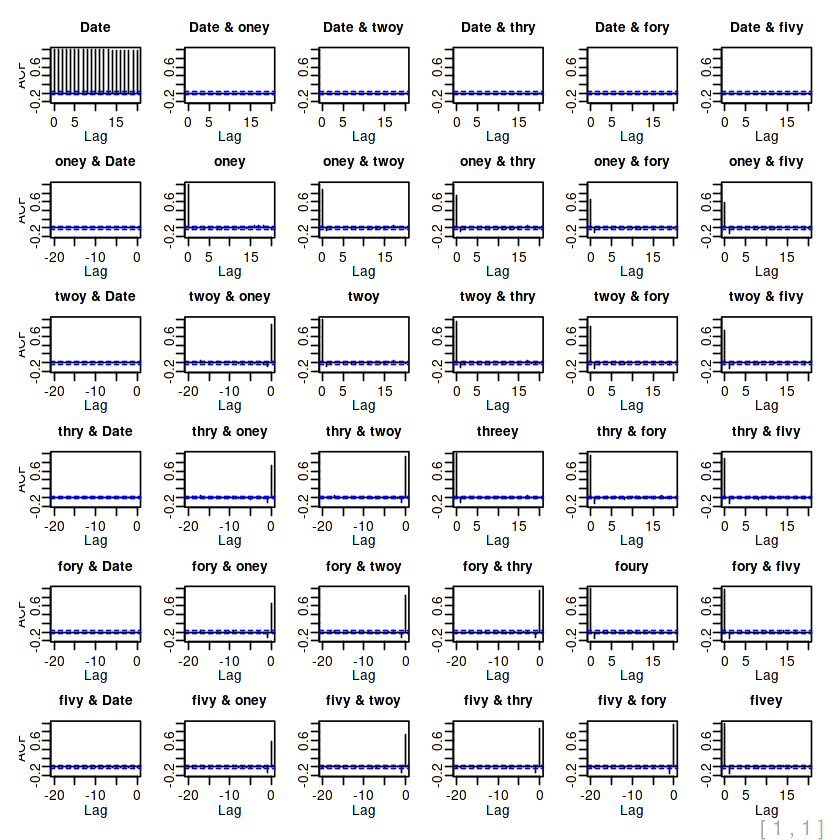

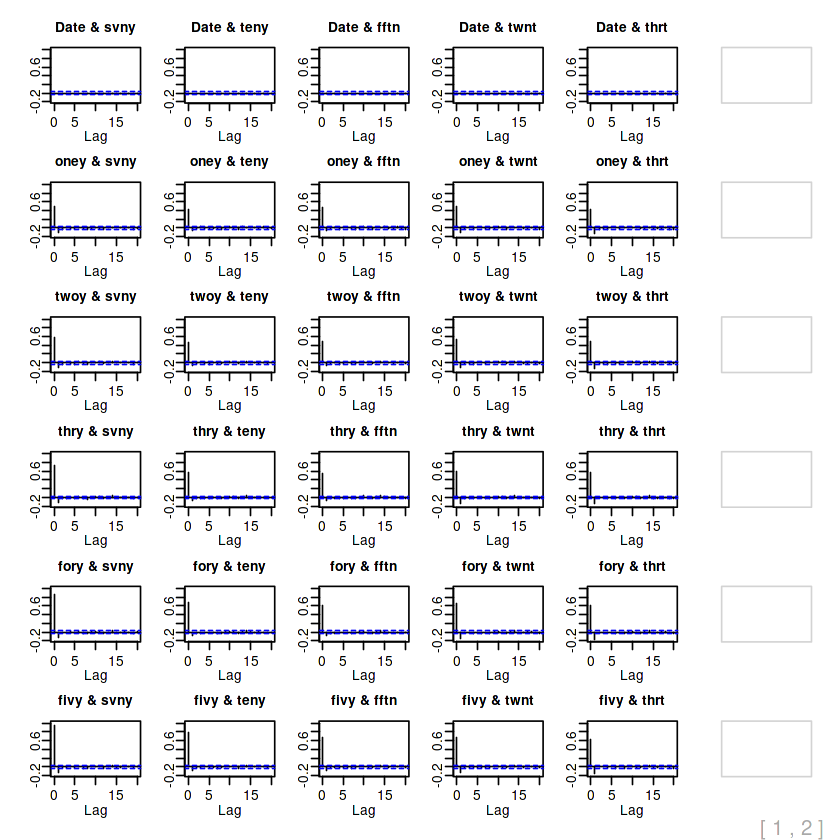

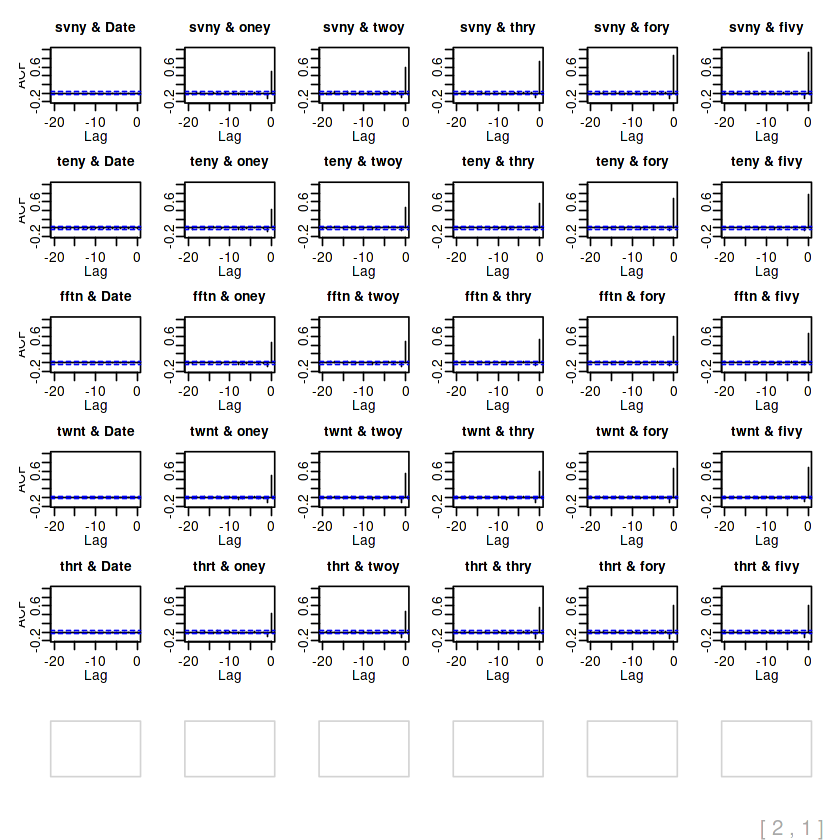

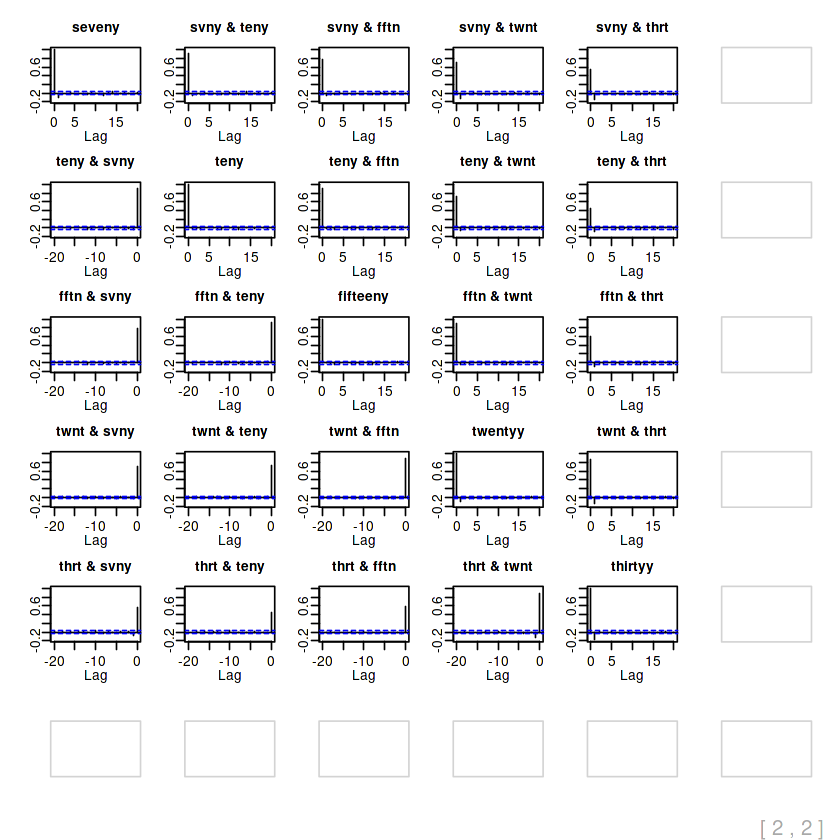

In [15]:
acf(data, lag.max=20)


In [16]:
#Exporting the image as jpeg

jpeg(file="ACF in stationary_part1.jpeg")


acf(data, lag.max=20)
dev.off() 


png 
  2

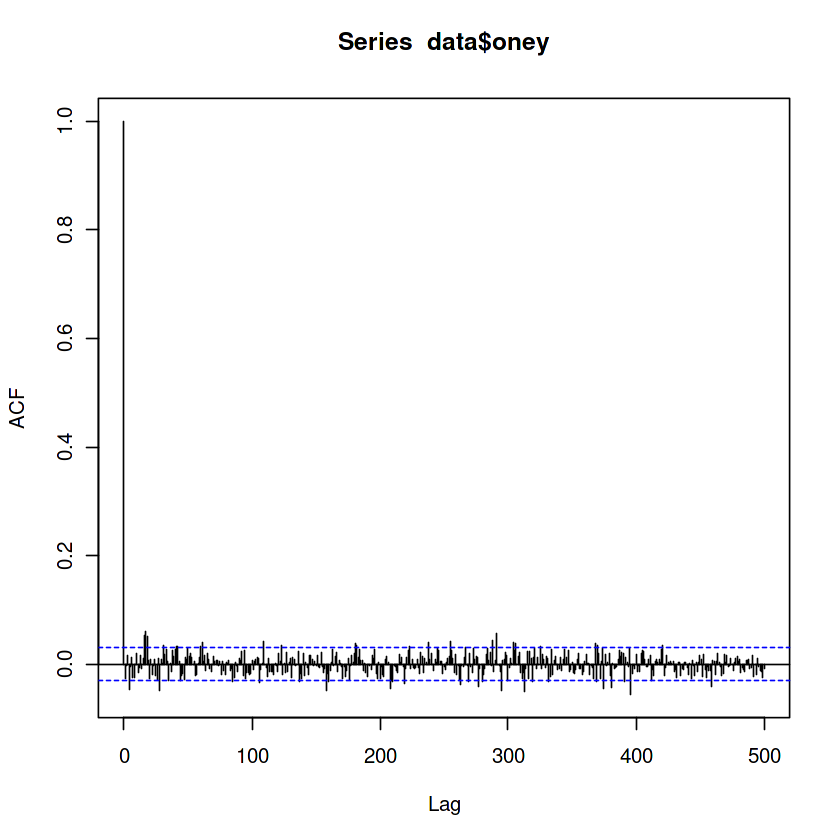

In [17]:
acf(data$oney, lag.max=500)



In [18]:
#Exporting the image as jpeg

jpeg(file="ACF in stationary_part1_1.jpeg")

acf(data$oney, lag.max=500)

dev.off() 


png 
  2

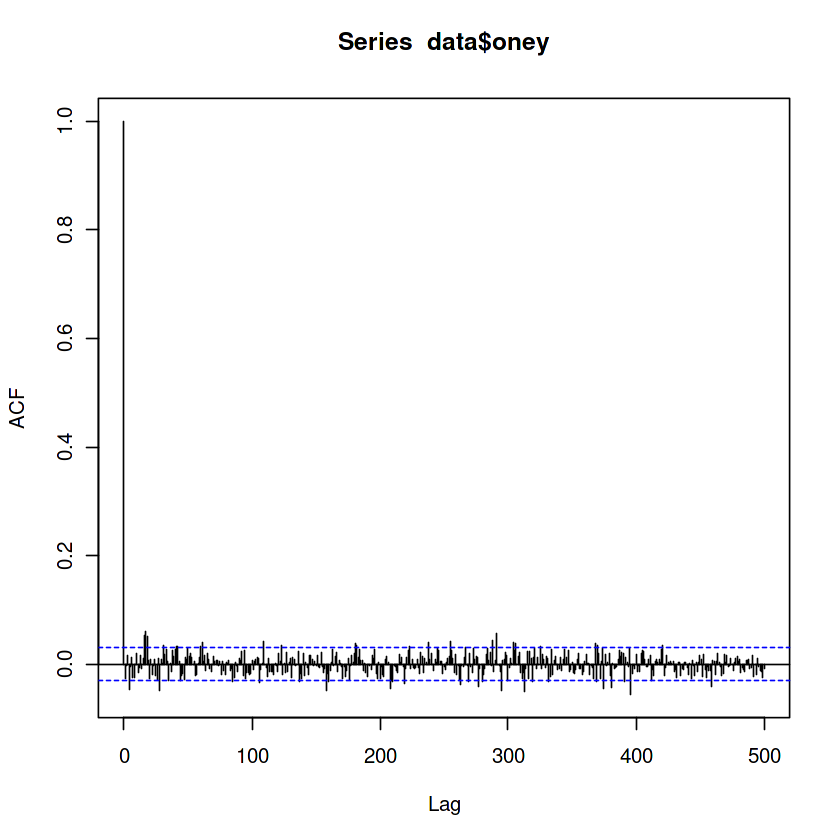

In [19]:
acf(data$oney, lag.max=500)


In [20]:
#Exporting the image as jpeg

jpeg(file="ACF in stationary_part1_2.jpeg")
acf(data$twoy, lag.max=500)

dev.off() 

png 
  2

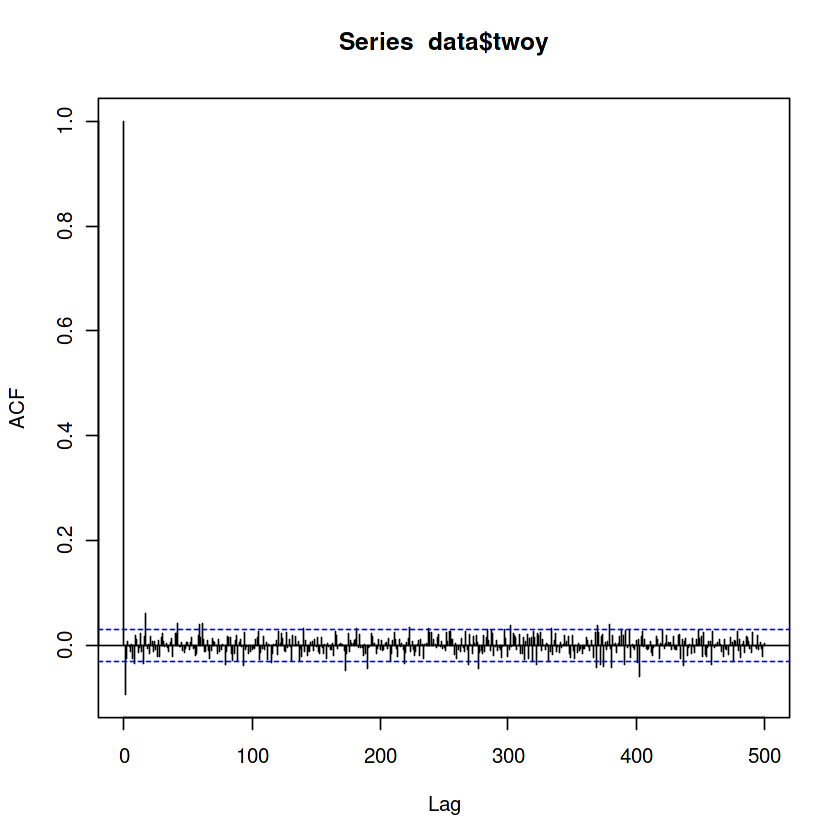

In [21]:
acf(data$twoy, lag.max=500)


In [22]:
#Exporting the image as jpeg

jpeg(file="ACF in stationary_part1_3.jpeg")
acf(data$threey, lag.max=500)

dev.off() 

png 
  2

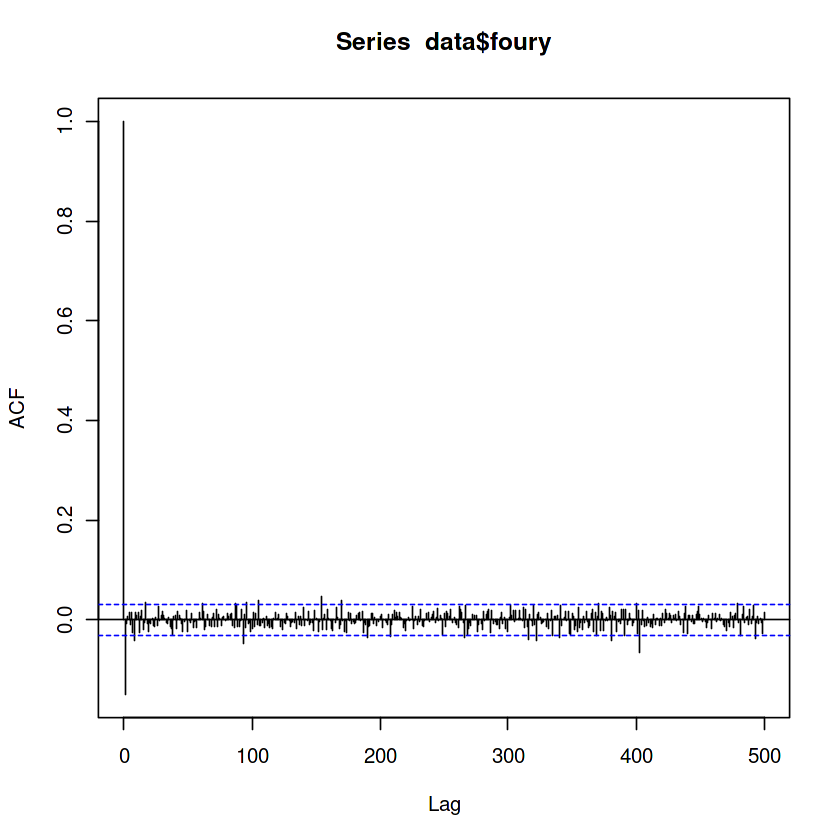

In [23]:
acf(data$foury, lag.max=500)


In [24]:
#Exporting the image as jpeg

jpeg(file="ACF in stationary_part1_4.jpeg")
acf(data$foury, lag.max=500)

dev.off() 

png 
  2

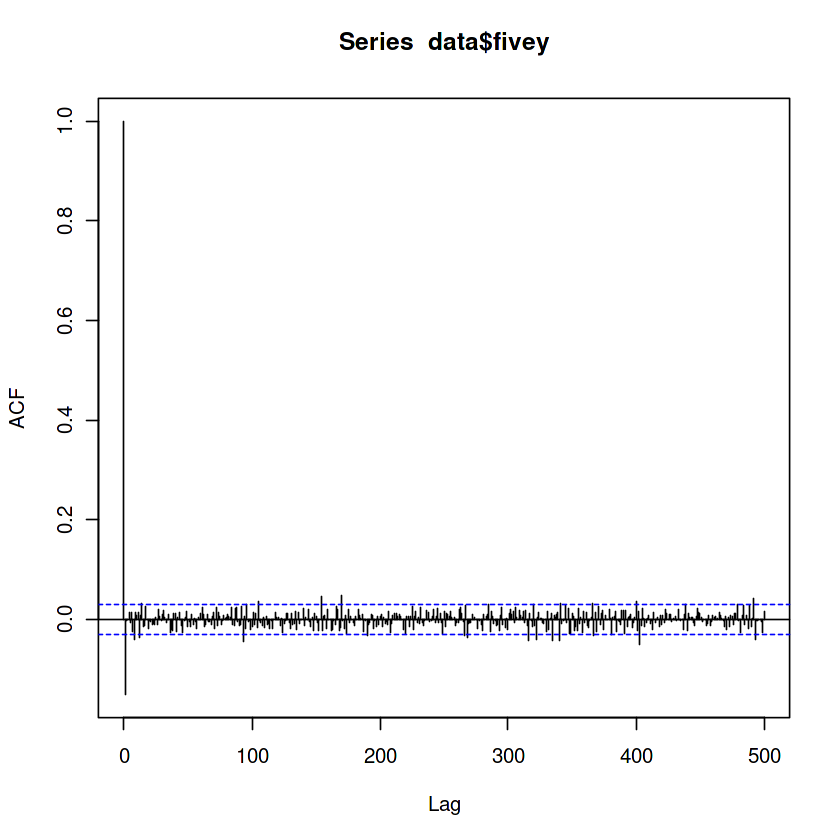

In [25]:
acf(data$fivey, lag.max=500)


In [26]:
#Exporting the image as jpeg

jpeg(file="ACF in stationary_part1_5.jpeg")
acf(data$fivey, lag.max=500)

dev.off() 

png 
  2

In [27]:
#Exporting the image as jpeg

jpeg(file="ACF in stationary_part1_6.jpeg")
acf(data$seveny, lag.max=500)

dev.off() 

png 
  2

In [28]:
#Exporting the image as jpeg

jpeg(file="ACF in stationary_part1_7.jpeg")
acf(data$teny, lag.max=500)

dev.off() 

png 
  2

In [29]:
#Exporting the image as jpeg

jpeg(file="ACF in stationary_part1_8.jpeg")
acf(data$fifteeny, lag.max=500)

dev.off() 

png 
  2

In [30]:
#Exporting the image as jpeg

jpeg(file="ACF in stationary_part1_9.jpeg")
acf(data$twentyy, lag.max=500)

dev.off() 

png 
  2

In [31]:
#Exporting the image as jpeg

jpeg(file="ACF in stationary_part1_10.jpeg")
acf(data$thirtyy, lag.max=500)

dev.off() 

png 
  2

In [32]:
# Selecting all columns apart from "Date"

data <- select(data, -c("Date"))
head(data)
summary(data)


oney,twoy,threey,foury,fivey,seveny,teny,fifteeny,twentyy,thirtyy
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.05,0.04,0.01,0.00,-0.01,-0.02,-0.03,-0.02,-0.02,-0.02
0.03,0.04,0.04,0.03,0.02,0.01,0.01,-0.01,0.00,0.00
-0.07,-0.10,-0.10,-0.09,-0.08,-0.06,-0.04,-0.02,-0.02,-0.01
-0.07,-0.07,-0.06,-0.04,-0.04,-0.02,-0.02,-0.02,-0.02,-0.02
0.06,0.05,0.04,0.01,0.01,0.00,0.00,0.01,0.01,0.00
-0.02,-0.02,-0.02,-0.01,-0.01,-0.01,0.00,0.00,0.00,0.01


      oney                 twoy               threey         
 Min.   :-0.9700000   Min.   :-1.160000   Min.   :-1.360000  
 1st Qu.:-0.0200000   1st Qu.:-0.020000   1st Qu.:-0.030000  
 Median : 0.0000000   Median : 0.000000   Median : 0.000000  
 Mean   :-0.0008246   Mean   :-0.001003   Mean   :-0.001125  
 3rd Qu.: 0.0100000   3rd Qu.: 0.020000   3rd Qu.: 0.020000  
 Max.   : 0.9800000   Max.   : 1.170000   Max.   : 1.370000  
     foury               fivey               seveny         
 Min.   :-1.510000   Min.   :-1.540000   Min.   :-1.310000  
 1st Qu.:-0.030000   1st Qu.:-0.030000   1st Qu.:-0.030000  
 Median : 0.000000   Median : 0.000000   Median : 0.000000  
 Mean   :-0.001201   Mean   :-0.001248   Mean   :-0.001277  
 3rd Qu.: 0.020000   3rd Qu.: 0.020000   3rd Qu.: 0.020000  
 Max.   : 1.520000   Max.   : 1.530000   Max.   : 1.300000  
      teny              fifteeny           twentyy             thirtyy         
 Min.   :-0.880000   Min.   :-0.93000   Min.   :-1.590000  

In [33]:
# Transforming my data frame to Matrix 

X <- as.matrix(data)
X
summary(X)

oney,twoy,threey,foury,fivey,seveny,teny,fifteeny,twentyy,thirtyy
0.05,0.04,0.01,0.00,-0.01,-0.02,-0.03,-0.02,-0.02,-0.02
0.03,0.04,0.04,0.03,0.02,0.01,0.01,-0.01,0.00,0.00
-0.07,-0.10,-0.10,-0.09,-0.08,-0.06,-0.04,-0.02,-0.02,-0.01
-0.07,-0.07,-0.06,-0.04,-0.04,-0.02,-0.02,-0.02,-0.02,-0.02
0.06,0.05,0.04,0.01,0.01,0.00,0.00,0.01,0.01,0.00
-0.02,-0.02,-0.02,-0.01,-0.01,-0.01,0.00,0.00,0.00,0.01
0.01,0.00,0.00,0.00,0.00,0.00,-0.01,-0.01,-0.01,-0.01
0.01,0.02,0.01,0.01,0.00,0.00,-0.01,-0.01,-0.01,-0.02
-0.05,-0.07,-0.05,-0.04,-0.03,-0.02,-0.01,-0.01,-0.01,-0.01
0.00,0.00,-0.02,-0.02,-0.02,-0.03,-0.02,-0.02,-0.02,-0.02


      oney                 twoy               threey         
 Min.   :-0.9700000   Min.   :-1.160000   Min.   :-1.360000  
 1st Qu.:-0.0200000   1st Qu.:-0.020000   1st Qu.:-0.030000  
 Median : 0.0000000   Median : 0.000000   Median : 0.000000  
 Mean   :-0.0008246   Mean   :-0.001003   Mean   :-0.001125  
 3rd Qu.: 0.0100000   3rd Qu.: 0.020000   3rd Qu.: 0.020000  
 Max.   : 0.9800000   Max.   : 1.170000   Max.   : 1.370000  
     foury               fivey               seveny         
 Min.   :-1.510000   Min.   :-1.540000   Min.   :-1.310000  
 1st Qu.:-0.030000   1st Qu.:-0.030000   1st Qu.:-0.030000  
 Median : 0.000000   Median : 0.000000   Median : 0.000000  
 Mean   :-0.001201   Mean   :-0.001248   Mean   :-0.001277  
 3rd Qu.: 0.020000   3rd Qu.: 0.020000   3rd Qu.: 0.020000  
 Max.   : 1.520000   Max.   : 1.530000   Max.   : 1.300000  
      teny              fifteeny           twentyy             thirtyy         
 Min.   :-0.880000   Min.   :-0.93000   Min.   :-1.590000  

## Correlation Matrix

In [34]:
R <- cor(X)
R

stargazer(R, type = 'latex', out = "corr_matrix1.tex")


,oney,twoy,threey,foury,fivey,seveny,teny,fifteeny,twentyy,thirtyy
oney,1.0000000,0.8706722,0.7382580,0.6541856,0.5864366,0.4944913,0.4292606,0.4581945,0.4929077,0.4263754
twoy,0.8706722,1.0000000,0.9367560,0.8332568,0.7308554,0.5828366,0.4687370,0.4876800,0.5403280,0.4814921
threey,0.7382580,0.9367560,1.0000000,0.9571461,0.8832763,0.7341091,0.5671174,0.5397008,0.6039285,0.5612948
foury,0.6541856,0.8332568,0.9571461,1.0000000,0.9718646,0.8646631,0.6798993,0.6033408,0.6561303,0.6124999
fivey,0.5864366,0.7308554,0.8832763,0.9718646,1.0000000,0.9430855,0.7754158,0.6621698,0.6823133,0.6171552
seveny,0.4944913,0.5828366,0.7341091,0.8646631,0.9430855,1.0000000,0.9148106,0.7738225,0.7010445,0.5536456
teny,0.4292606,0.4687370,0.5671174,0.6798993,0.7754158,0.9148106,1.0000000,0.9119636,0.7298209,0.4442410
fifteeny,0.4581945,0.4876800,0.5397008,0.6033408,0.6621698,0.7738225,0.9119636,1.0000000,0.8908696,0.5892942
twentyy,0.4929077,0.5403280,0.6039285,0.6561303,0.6823133,0.7010445,0.7298209,0.8908696,1.0000000,0.8743291
thirtyy,0.4263754,0.4814921,0.5612948,0.6124999,0.6171552,0.5536456,0.4442410,0.5892942,0.8743291,1.0000000



% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Sun, Sep 05, 2021 - 14:55:27
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}} ccccccccccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & oney & twoy & threey & foury & fivey & seveny & teny & fifteeny & twentyy & thirtyy \\ 
\hline \\[-1.8ex] 
oney & $1$ & $0.871$ & $0.738$ & $0.654$ & $0.586$ & $0.494$ & $0.429$ & $0.458$ & $0.493$ & $0.426$ \\ 
twoy & $0.871$ & $1$ & $0.937$ & $0.833$ & $0.731$ & $0.583$ & $0.469$ & $0.488$ & $0.540$ & $0.481$ \\ 
threey & $0.738$ & $0.937$ & $1$ & $0.957$ & $0.883$ & $0.734$ & $0.567$ & $0.540$ & $0.604$ & $0.561$ \\ 
foury & $0.654$ & $0.833$ & $0.957$ & $1$ & $0.972$ & $0.865$ & $0.680$ & $0.603$ & $0.656$ & $0.612$ \\ 
fivey & $0.586$ & $0.731$ & $0.883$ & $0.972$ & $1$ & $0.943$ & $0.775$ & $0.662$ & $0.682$ & $0.617$ \\ 
seveny & $0.494$ & $0.583$ & $0.734$ & $0.865$ & $0.943$ & 

In [35]:
# Spectral Decomposition of the correlation Matrix

pcaR <- eigen(R)
pcaR


eigen() decomposition
$values
 [1] 7.153580601 1.298549398 0.783190500 0.532287252 0.171760534 0.033680942
 [7] 0.010347208 0.006111843 0.005556292 0.004935429

$vectors
            [,1]        [,2]         [,3]       [,4]        [,5]        [,6]
 [1,] -0.2696698 -0.42234620  0.168142745  0.5607583  0.57385993  0.23448131
 [2,] -0.3067917 -0.45569305  0.081421044  0.1919071 -0.34780966 -0.51602942
 [3,] -0.3350206 -0.33842415 -0.039055195 -0.1664669 -0.40391817  0.02239095
 [4,] -0.3498365 -0.18364323 -0.142354710 -0.3249854 -0.08561513  0.33685036
 [5,] -0.3511049 -0.04080867 -0.231079601 -0.3427725  0.17997756  0.27264572
 [6,] -0.3381675  0.17381339 -0.359954827 -0.1626098  0.35834359 -0.19578992
 [7,] -0.3084152  0.35745373 -0.374635073  0.2528929  0.07092551 -0.41974702
 [8,] -0.3056085  0.40821821 -0.001821153  0.4161192 -0.33746864  0.22773354
 [9,] -0.3153690  0.32660028  0.414586602  0.0824071 -0.17817037  0.30800868
[10,] -0.2700493  0.18097602  0.669407495 -0.3571543  0.2603

In [36]:
# Using the function prcomp() to obtain principal components

pcaData <- prcomp(data, scale = T, center = T)
pcaData
summary <- summary(pcaData)
summary


Standard deviations (1, .., p=10):
 [1] 2.67461784 1.13953912 0.88498051 0.72958019 0.41444002 0.18352368
 [7] 0.10172123 0.07817828 0.07454054 0.07025261

Rotation (n x k) = (10 x 10):
                PC1         PC2          PC3        PC4         PC5         PC6
oney     -0.2696698 -0.42234620 -0.168142745 -0.5607583 -0.57385993 -0.23448131
twoy     -0.3067917 -0.45569305 -0.081421044 -0.1919071  0.34780966  0.51602942
threey   -0.3350206 -0.33842415  0.039055195  0.1664669  0.40391817 -0.02239095
foury    -0.3498365 -0.18364323  0.142354710  0.3249854  0.08561513 -0.33685036
fivey    -0.3511049 -0.04080867  0.231079601  0.3427725 -0.17997756 -0.27264572
seveny   -0.3381675  0.17381339  0.359954827  0.1626098 -0.35834359  0.19578992
teny     -0.3084152  0.35745373  0.374635073 -0.2528929 -0.07092551  0.41974702
fifteeny -0.3056085  0.40821821  0.001821153 -0.4161192  0.33746864 -0.22773354
twentyy  -0.3153690  0.32660028 -0.414586602 -0.0824071  0.17817037 -0.30800868
thirtyy  -0.27

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.6746 1.1395 0.88498 0.72958 0.41444 0.18352 0.10172
Proportion of Variance 0.7154 0.1298 0.07832 0.05323 0.01718 0.00337 0.00103
Cumulative Proportion  0.7154 0.8452 0.92353 0.97676 0.99394 0.99730 0.99834
                           PC8     PC9    PC10
Standard deviation     0.07818 0.07454 0.07025
Proportion of Variance 0.00061 0.00056 0.00049
Cumulative Proportion  0.99895 0.99951 1.00000

## Correct signs - arbitrary choice to have the signs so that the first PC is positive


In [37]:
- pcaData$rotation
rotation <- - pcaData$rotation

rotation


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
oney,0.2696698,0.42234620,0.168142745,0.5607583,0.57385993,0.23448131,-0.13687969,-0.05461942,0.001425271,-0.01272554
twoy,0.3067917,0.45569305,0.081421044,0.1919071,-0.34780966,-0.51602942,0.45310985,0.24582207,0.018419508,0.03782509
threey,0.3350206,0.33842415,-0.039055195,-0.1664669,-0.40391817,0.02239095,-0.45004181,-0.58051519,-0.201625563,-0.01241478
foury,0.3498365,0.18364323,-0.142354710,-0.3249854,-0.08561513,0.33685036,-0.17501226,0.41343970,0.605174423,-0.17150308
fivey,0.3511049,0.04080867,-0.231079601,-0.3427725,0.17997756,0.27264572,0.21180270,0.28488430,-0.656074680,0.20245531
seveny,0.3381675,-0.17381339,-0.359954827,-0.1626098,0.35834359,-0.19578992,0.38531691,-0.50975715,0.335448147,0.10877261
teny,0.3084152,-0.35745373,-0.374635073,0.2528929,0.07092551,-0.41974702,-0.39823921,0.23013064,-0.161985744,-0.39215896
fifteeny,0.3056085,-0.40821821,-0.001821153,0.4161192,-0.33746864,0.22773354,-0.05679201,0.05248207,0.118401249,0.61729790
twentyy,0.3153690,-0.32660028,0.414586602,0.0824071,-0.17817037,0.30800868,0.35569680,-0.15579076,-0.091432524,-0.57396582
thirtyy,0.2700493,-0.18097602,0.669407495,-0.3571543,0.26032891,-0.35940755,-0.24722252,0.08752886,0.034527561,0.22746021


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
oney,0.2696698,0.42234620,0.168142745,0.5607583,0.57385993,0.23448131,-0.13687969,-0.05461942,0.001425271,-0.01272554
twoy,0.3067917,0.45569305,0.081421044,0.1919071,-0.34780966,-0.51602942,0.45310985,0.24582207,0.018419508,0.03782509
threey,0.3350206,0.33842415,-0.039055195,-0.1664669,-0.40391817,0.02239095,-0.45004181,-0.58051519,-0.201625563,-0.01241478
foury,0.3498365,0.18364323,-0.142354710,-0.3249854,-0.08561513,0.33685036,-0.17501226,0.41343970,0.605174423,-0.17150308
fivey,0.3511049,0.04080867,-0.231079601,-0.3427725,0.17997756,0.27264572,0.21180270,0.28488430,-0.656074680,0.20245531
seveny,0.3381675,-0.17381339,-0.359954827,-0.1626098,0.35834359,-0.19578992,0.38531691,-0.50975715,0.335448147,0.10877261
teny,0.3084152,-0.35745373,-0.374635073,0.2528929,0.07092551,-0.41974702,-0.39823921,0.23013064,-0.161985744,-0.39215896
fifteeny,0.3056085,-0.40821821,-0.001821153,0.4161192,-0.33746864,0.22773354,-0.05679201,0.05248207,0.118401249,0.61729790
twentyy,0.3153690,-0.32660028,0.414586602,0.0824071,-0.17817037,0.30800868,0.35569680,-0.15579076,-0.091432524,-0.57396582
thirtyy,0.2700493,-0.18097602,0.669407495,-0.3571543,0.26032891,-0.35940755,-0.24722252,0.08752886,0.034527561,0.22746021


## Principal components

In [38]:
pcaData$rotation


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
oney,-0.2696698,-0.42234620,-0.168142745,-0.5607583,-0.57385993,-0.23448131,0.13687969,0.05461942,-0.001425271,0.01272554
twoy,-0.3067917,-0.45569305,-0.081421044,-0.1919071,0.34780966,0.51602942,-0.45310985,-0.24582207,-0.018419508,-0.03782509
threey,-0.3350206,-0.33842415,0.039055195,0.1664669,0.40391817,-0.02239095,0.45004181,0.58051519,0.201625563,0.01241478
foury,-0.3498365,-0.18364323,0.142354710,0.3249854,0.08561513,-0.33685036,0.17501226,-0.41343970,-0.605174423,0.17150308
fivey,-0.3511049,-0.04080867,0.231079601,0.3427725,-0.17997756,-0.27264572,-0.21180270,-0.28488430,0.656074680,-0.20245531
seveny,-0.3381675,0.17381339,0.359954827,0.1626098,-0.35834359,0.19578992,-0.38531691,0.50975715,-0.335448147,-0.10877261
teny,-0.3084152,0.35745373,0.374635073,-0.2528929,-0.07092551,0.41974702,0.39823921,-0.23013064,0.161985744,0.39215896
fifteeny,-0.3056085,0.40821821,0.001821153,-0.4161192,0.33746864,-0.22773354,0.05679201,-0.05248207,-0.118401249,-0.61729790
twentyy,-0.3153690,0.32660028,-0.414586602,-0.0824071,0.17817037,-0.30800868,-0.35569680,0.15579076,0.091432524,0.57396582
thirtyy,-0.2700493,0.18097602,-0.669407495,0.3571543,-0.26032891,0.35940755,0.24722252,-0.08752886,-0.034527561,-0.22746021


## Eigenvalues

In [39]:
#Eigenvalues
pcaR$values


[1] 7.153580601 1.298549398 0.783190500 0.532287252 0.171760534 0.033680942
 [7] 0.010347208 0.006111843 0.005556292 0.004935429

In [40]:
# Calculate the Principal Components
factors <- X %*% pcaR$vectors
factors

# Principal Components from 1 to 5
pc1 <- factors[ ,1] 
pc2 <- factors[ ,2] 
pc3 <- factors[ ,3] 
pc4 <- factors[ ,4] 
pc5 <- factors[ ,5] 


0.0082420226,-0.07483696,0.0103789129,0.0303152245,0.0047532174,0.0015618566,0.0078691570,-0.0020547375,-0.0022732187,0.0029014967
-0.0546895259,-0.04953006,-0.0094810045,-0.0020230149,-0.0041548406,-0.0055853790,-0.0045592861,0.0002465160,0.0017011334,-0.0094681827
0.1903785043,0.08753546,0.0369250235,0.0081152741,0.0116815996,0.0022384721,-0.0026136541,0.0001365573,-0.0017090037,0.0036073681
0.1192433938,0.06180504,-0.0071404420,-0.0206213509,0.0011578940,0.0027691128,0.0026195809,0.0005781076,-0.0080452357,-0.0019982891
-0.0581397908,-0.05655872,0.0129907205,0.0348898622,-0.0033283798,0.0006154287,-0.0002020092,0.0082565159,0.0072978462,0.0013739737
0.0259202403,0.02664541,0.0098177944,-0.0069918361,0.0016335868,-0.0025479940,-0.0040170655,-0.0067758708,-0.0011354124,0.0006236584
0.0092977211,-0.01695594,-0.0053939513,0.0016649339,0.0075824451,0.0047789365,0.0020967725,0.0026897023,-0.0010191473,0.0010864115
-0.0009861921,-0.03310024,-0.0122737044,0.0041600957,-0.0068723701,0.0016448369,0.0073806539,0.0003193044,-0.0050777504,-0.0022708675
0.0949943218,0.06229827,0.0005964437,-0.0105559294,0.0085518406,0.0079749821,-0.0059659734,0.0024832967,0.0015081559,-0.0015660615
0.0548531046,-0.01942185,0.0048976775,0.0136774922,-0.0008715014,-0.0018957961,0.0036366590,-0.0086495221,0.0030031389,-0.0012065935
-0.0185471956,-0.01200098,0.0048090607,-0.0010003238,0.0003688642,-0.0079196367,-0.0044575907,0.0139205601,0.0001343064,0.0033650279


## Shift, Slope and Curvature

With the term **shift** it is here meant the shift of the entire yield curve. If the front end (the front end part of the curve means the short term maturities) shifts lower and lower, the 10y maturity and the rest of the curve will shift accordingly. Being the 10year maturity here in the ‘middle’ of the curve, this will be the maturity chosen to represent the shift of the yield curve. 

With the term **slope** it is here meant a spread. A spread is the difference between two financial assets, here bonds and their yields. The spread considered for the slope is the common 2s10s spread. This is calculated by the 10year yield minus the 2 year yield. 

With the term **curvature** it will here be meant the ‘butterfly’ spread. A butterfly spread in financial terms is the spread within a butterfly trade. A butterfly trade consists picking two points on the curve and selling (buying) them while simultaneously picking a point between these two and buying (selling) it. The former trade is performed if one is betting that the curve in the chosen part of the curve is going to flatten and/or its curvature is going to look more convex. The latter is performed if one is betting that the chosen part of the curve is going to steepen and/or its curvature is going to look more concave. The butterfly trade can be expressed in any part of the curve – but the butterfly spread chosen here is to express the curvature of the entire curve, hence the picked butterfly spread here is the 7s15s30s spread. This is calculated by multiplying the 15 years yield by two and subtracting the 15 years yield and the 30 years yield. 

Accordingly to previous literature: the first PC should represent the shift, the second PC should represent the slope and the third PC should represent the curvature. 
We can show this here by looking at the absolute value of their respective correlations - if, in absolute values, this is near 1 (and/or above 0.5), we can state that these statement are being illustrated in a satisfactory manner. 


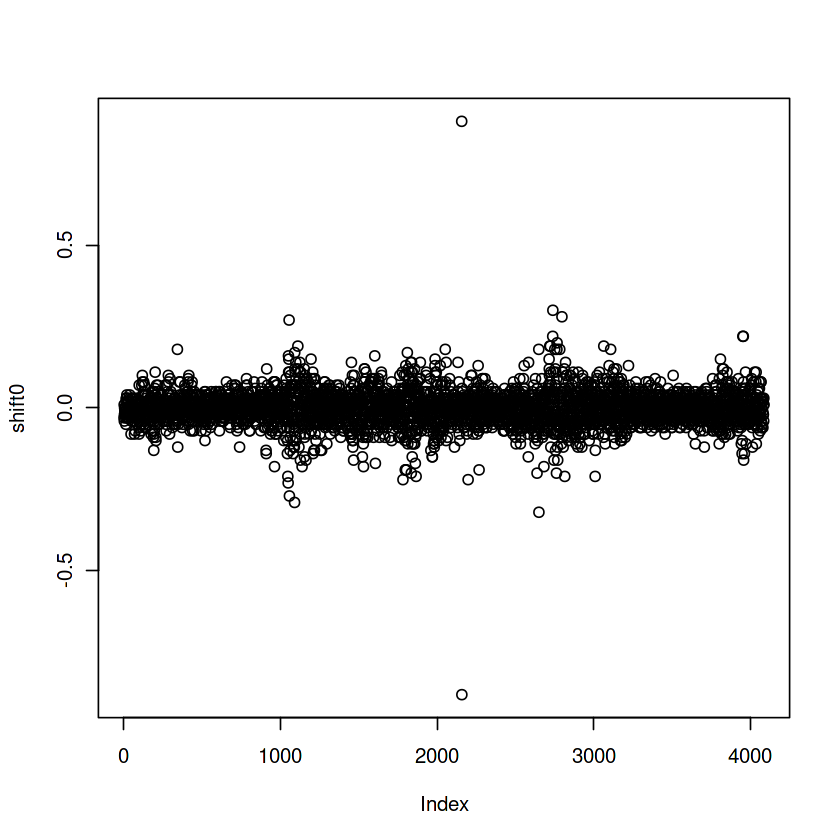

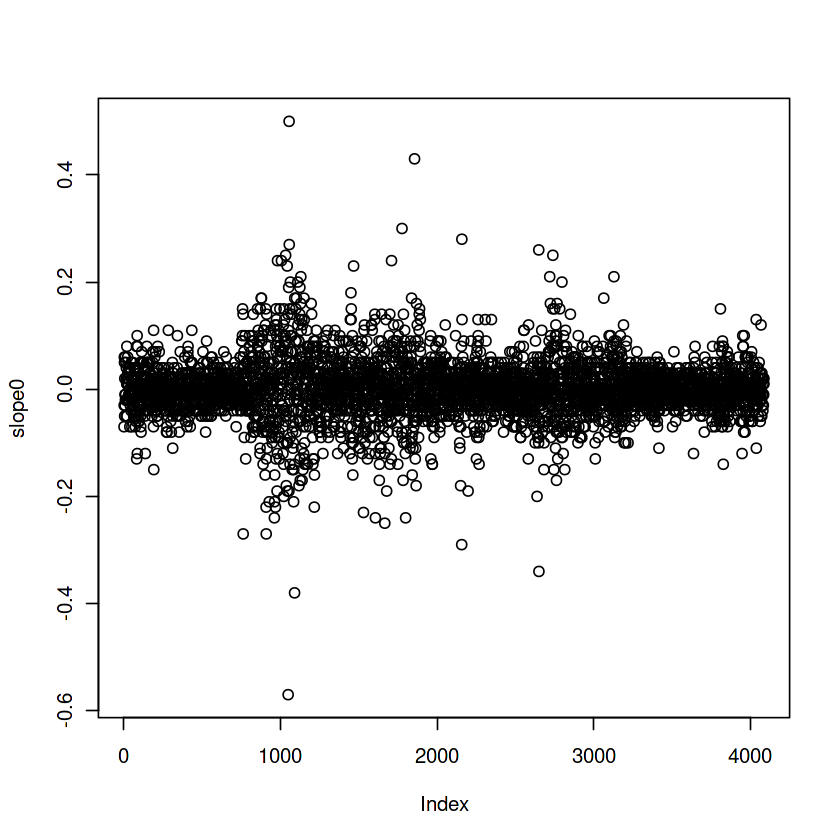

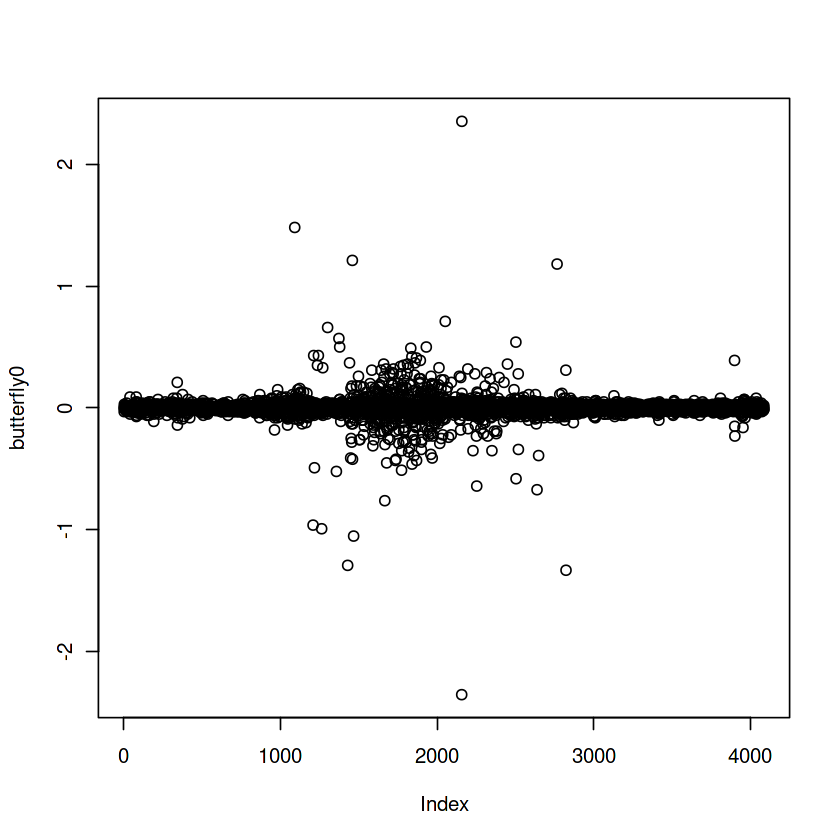

In [41]:
shift0 <- (data$teny)
plot(shift0)

slope0 <- (data$teny - data$twoy)
plot(slope0)

butterfly0 <- (2*data$fifteeny - data$seveny - data$thirtyy)
plot(butterfly0)

## Correlations of PC1 with Shift, PC2 with Slope, PC3 with Curvature

In [42]:
cor(shift0, pc1) 
cor(slope0, pc2)
cor(butterfly0, pc3)


[1] -0.8108974

[1] 0.8220531

[1] -0.6525208

Given how high these correlations are, in absolute terms, this is here shown to be the case. The first PC represents the shift, the second the slope and the third the curvature of an yield curve. 

## Plots

In [43]:
#Exporting the image as jpeg

jpeg(file="PC1_shift_d.jpeg", quality = 100)


yLimits <- c(min(pc1, pc5) , max(pc1, pc5))
plot(pc1, type = "l", ylim = yLimits, main = "PC1 and 10y maturity",
     xlab = "Index", ylab = "PC")
lines(shift0, col = "blue")
legend("bottomleft", legend = c("PC 1", "10y maturity"),
       col = c("black", "blue"), lwd = 1, cex = 0.7)

dev.off() 


png 
  2

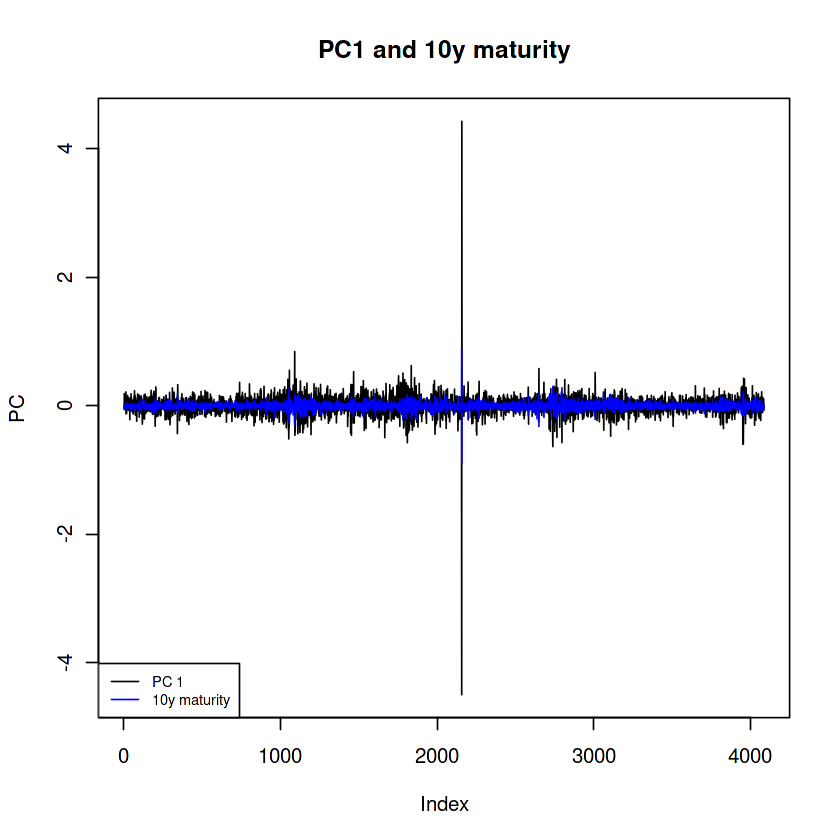

In [44]:
yLimits <- c(min(pc1, pc5) , max(pc1, pc5))
plot(pc1, type = "l", ylim = yLimits, main = "PC1 and 10y maturity",
     xlab = "Index", ylab = "PC")
lines(shift0, col = "blue")
legend("bottomleft", legend = c("PC 1", "10y maturity"),
       col = c("black", "blue"), lwd = 1, cex = 0.7)



In [45]:
#Exporting the image as jpeg

jpeg(file="PC2_shift_d.jpeg", quality = 100)



yLimits <- c(min(pc1, pc5) , max(pc1, pc5))
plot(pc2, type = "l", ylim = yLimits, main = "PC2 and 2y10y spread",
     xlab = "Index", ylab = "PC")
lines(slope0, col = "red")
legend("bottomleft", legend = c("PC 2", "2y10y spread"),
       col = c("black", "red"), lwd = 1, cex = 0.7)

dev.off() 

png 
  2

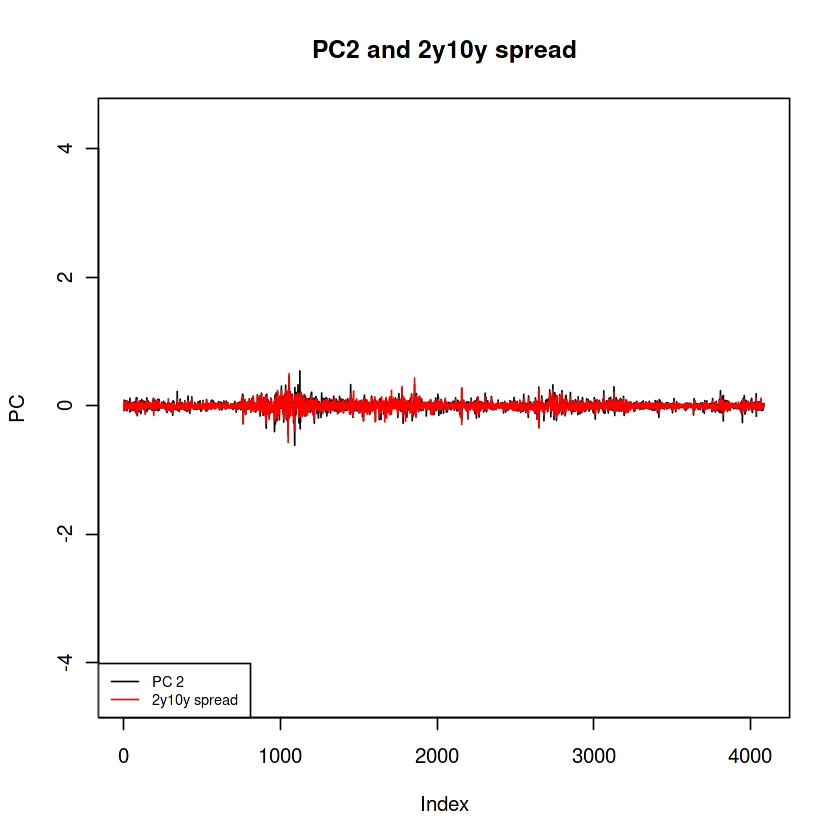

In [46]:
yLimits <- c(min(pc1, pc5) , max(pc1, pc5))
plot(pc2, type = "l", ylim = yLimits, main = "PC2 and 2y10y spread",
     xlab = "Index", ylab = "PC")
lines(slope0, col = "red")
legend("bottomleft", legend = c("PC 2", "2y10y spread"),
       col = c("black", "red"), lwd = 1, cex = 0.7)



In [47]:
#Exporting the image as jpeg

jpeg(file="PC3_shift_d.jpeg", quality = 100)


yLimits <- c(min(pc1, pc5) , max(pc1, pc5))
plot(pc3, type = "l", ylim = yLimits, main = "PC3 and Butterfly  spread",
     xlab = "Index", ylab = "PC")
lines(butterfly0, col = "orange")
legend("bottomleft", legend = c("PC 3", "Butterfly 7y15y30y"),
       col = c("black", "orange"), lwd = 1, cex = 0.7)


dev.off() 


png 
  2

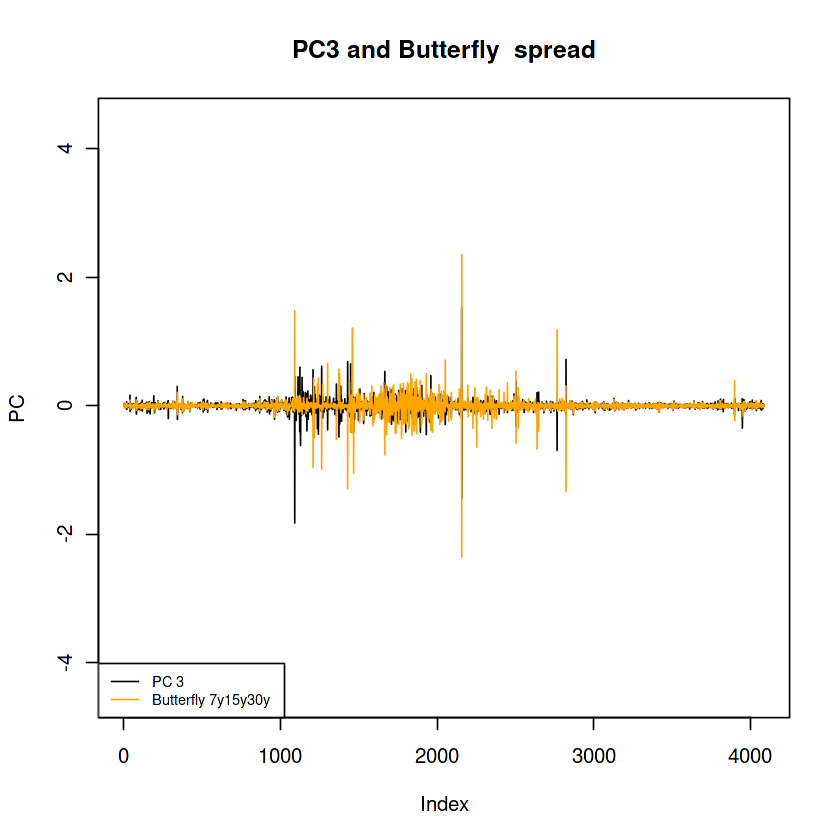

In [48]:
yLimits <- c(min(pc1, pc5) , max(pc1, pc5))
plot(pc3, type = "l", ylim = yLimits, main = "PC3 and Butterfly  spread",
     xlab = "Index", ylab = "PC")
lines(butterfly0, col = "orange")
legend("bottomleft", legend = c("PC 3", "Butterfly 7y15y30y"),
       col = c("black", "orange"), lwd = 1, cex = 0.7)


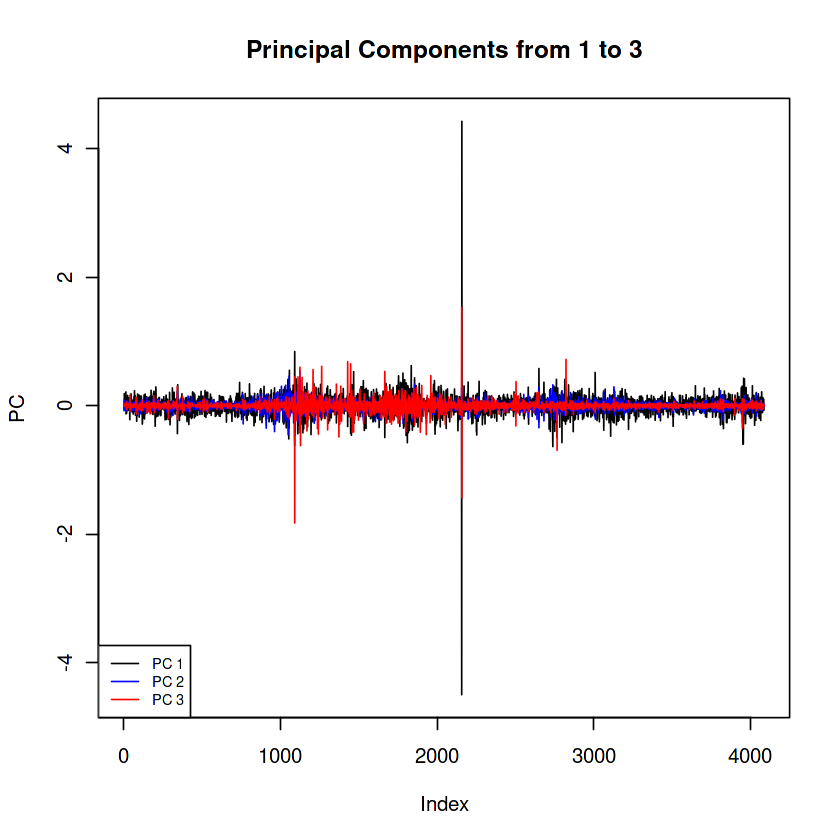

In [49]:
yLimits <- c(min(pc1, pc5) , max(pc1, pc5))
plot(pc1, type = "l", ylim = yLimits, main = "Principal Components from 1 to 3",
     xlab = "Index", ylab = "PC")
lines(pc2, col = "blue")
lines(pc3, col = "red")
legend("bottomleft", legend = c("PC 1", "PC 2", "PC 3"),
       col = c("black", "blue", "red"), lwd = 1, cex = 0.7)

## Loadings of the first three components

The first component as no sign change. The second component has 1 sign change. The third component has 2 sign changes. 

Also this can allude to the properties of shift, slope and curvature. 

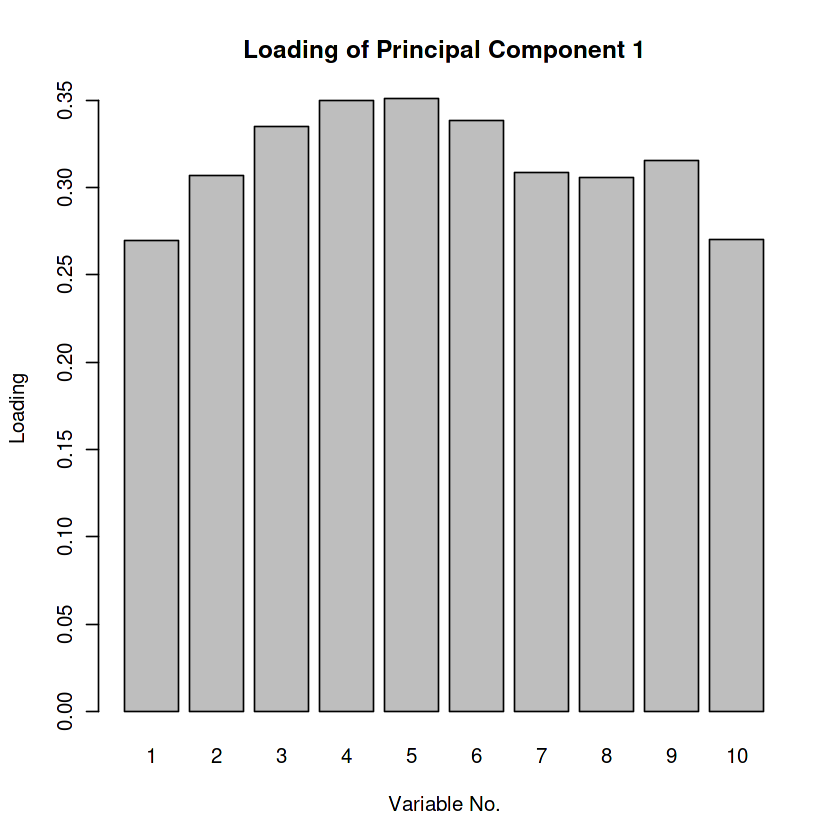

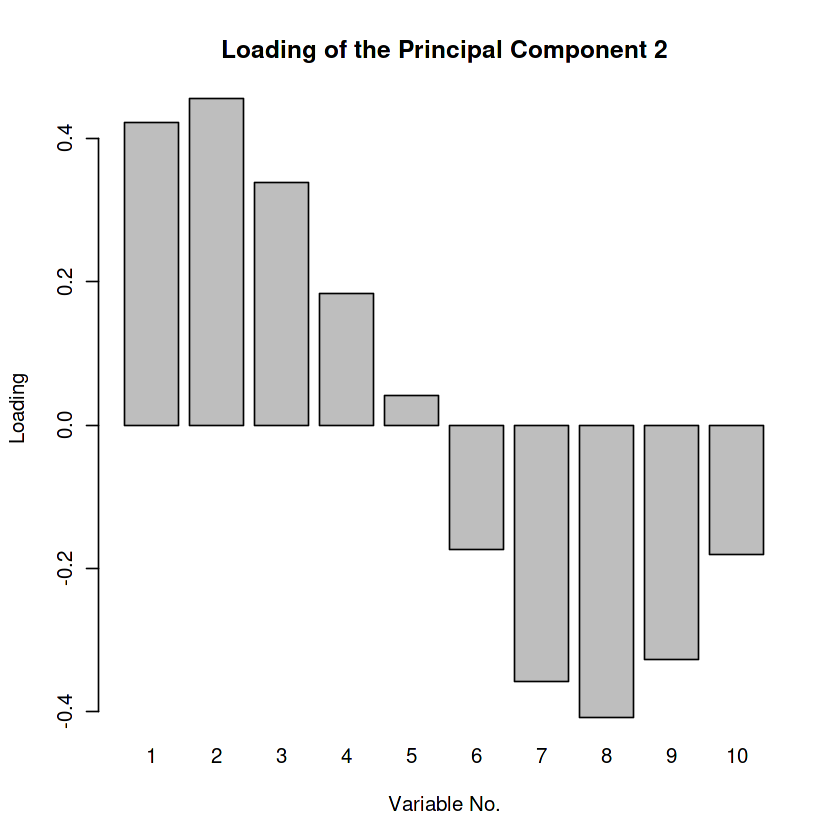

png 
  2

png 
  2

png 
  2

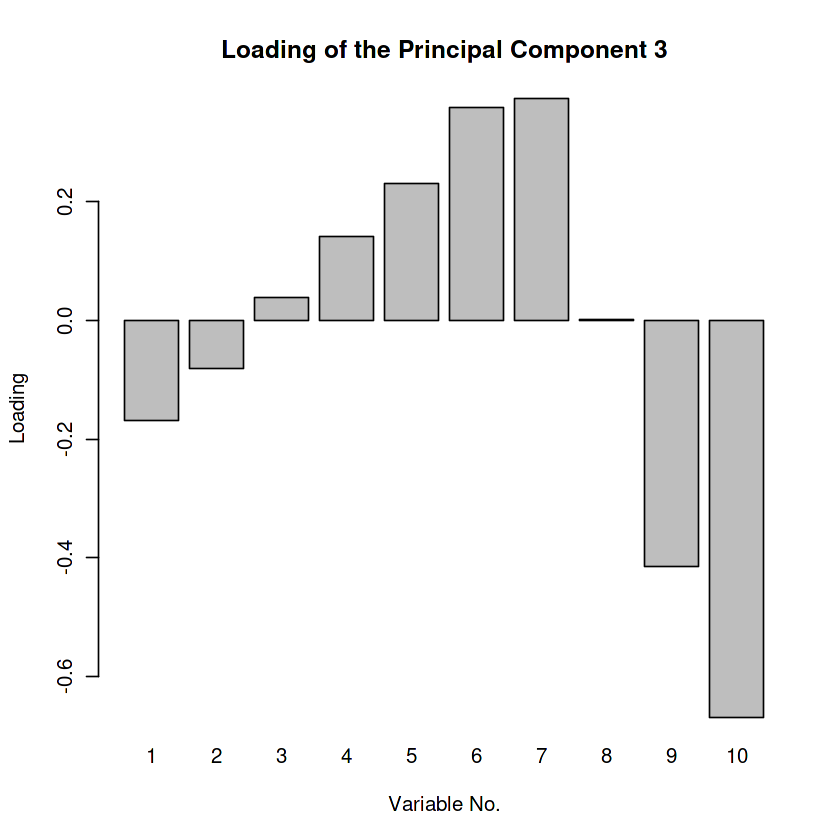

In [50]:
# Plot the loadings of the first three components
barplot(-pcaR$vectors[, 1], main = "Loading of Principal Component 1",
        names.arg = as.character(1:10), xlab = "Variable No.", ylab = "Loading")
barplot(-pcaR$vectors[, 2], main = "Loading of the Principal Component 2",
        names.arg = as.character(1:10), xlab = "Variable No.", ylab = "Loading")
barplot(-pcaR$vectors[, 3], main = "Loading of the Principal Component 3",
        names.arg = as.character(1:10), xlab = "Variable No.", ylab = "Loading")


#Exporting the images as jpeg

jpeg(file="PC1_loadings_d.jpeg", quality = 100)
barplot(-pcaR$vectors[, 1], main = "Loading of Principal Component 1",
        names.arg = as.character(1:10), xlab = "Variable No.", ylab = "Loading")
dev.off() 

jpeg(file="PC2_loadings_d.jpeg", quality = 100)
barplot(-pcaR$vectors[, 2], main = "Loading of the Principal Component 2",
        names.arg = as.character(1:10), xlab = "Variable No.", ylab = "Loading")
dev.off() 

jpeg(file="PC3_loadings_d.jpeg", quality = 100)
barplot(-pcaR$vectors[, 3], main = "Loading of the Principal Component 3",
        names.arg = as.character(1:10), xlab = "Variable No.", ylab = "Loading")
dev.off() 


## Explained Variability

In [51]:
#Relative Variences
vars <- pcaData$sdev^2/sum(pcaData$sdev^2)*100
vars


[1] 71.53580601 12.98549398  7.83190500  5.32287252  1.71760534  0.33680942
 [7]  0.10347208  0.06111843  0.05556292  0.04935429

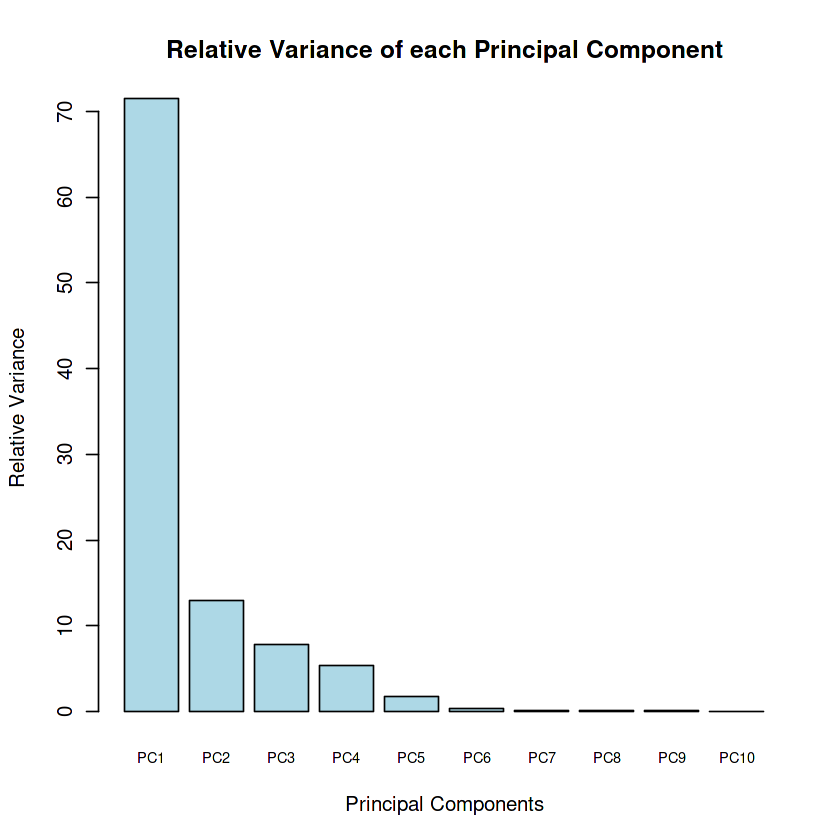

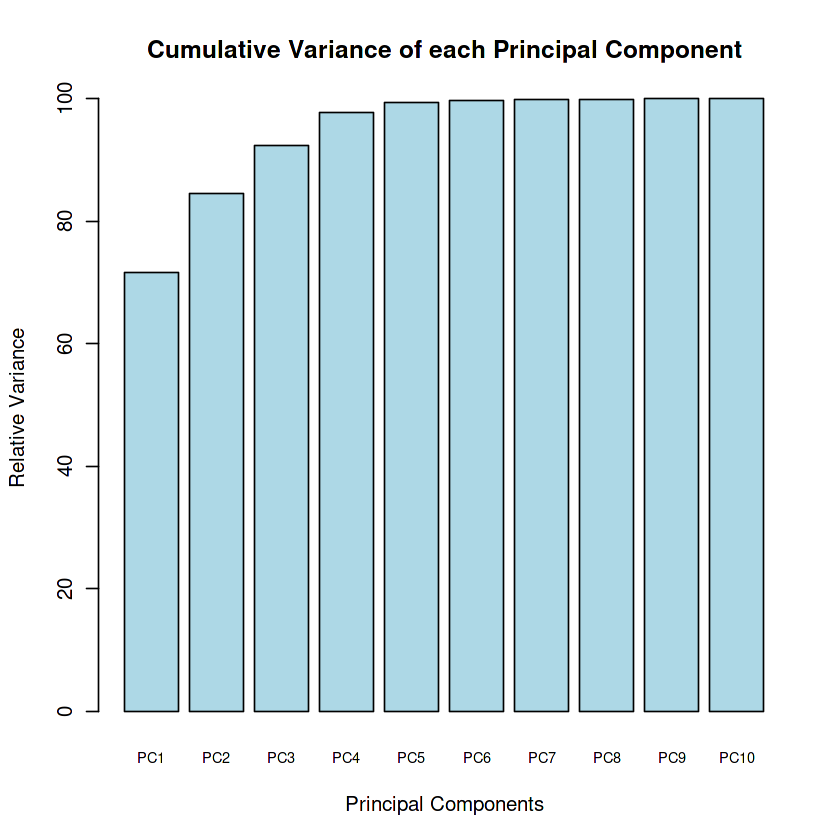

In [52]:
# Barplot of the relative variances
barplot(pcaData$sdev^2/sum(pcaData$sdev^2)*100, 
        names.arg = colnames(pcaData$rotation), 
        cex.names = 0.7, col = "lightblue", xlab = "Principal Components",
        ylab = "Relative Variance",
        main = "Relative Variance of each Principal Component")

# Barplot of the cumulative percentage of the variances 
barplot(cumsum(pcaData$sdev^2)/sum(pcaData$sdev^2)*100, 
        names.arg = colnames(pcaData$rotation), 
        cex.names = 0.7, col = "lightblue", xlab = "Principal Components",
        ylab = "Relative Variance",
        main = "Cumulative Variance of each Principal Component")
